Применение и последующее сравнение различных методов машинного обучения в задаче предсказания температуры плавления халькогенидных стекол в зависимости от их элементного состава

In [12]:
# Объявляю нужные библиотеки
import pandas as pd # Библиотека для работы с фреймворками
import numpy as np # Библиотека для математических операций
import matplotlib.pyplot as plt # Библиотека для визуализации данных
from sklearn.model_selection import train_test_split # Загрузка функции, разделяющей набор данных на тренировочную и тестовую выборки
from sklearn import ensemble, neighbors # Загрузка объектов, реализующих регрессию

Работа с исходными данными, взятыми из научной статьи *S. Singla et al. (2023)* [<u>https://doi.org/10.1088/2515-7639/acc6f2</u> ; <u>https://github.com/M3RG-IITD/chgs-ai</u>]. В качестве объекта выступает температура плавления халькогенидных стекол. Признаками же является молярное содержание тех или иных атомов халькогенов.

In [13]:
# Загрузка датасета из csv-файла
df = pd.read_csv('TG.csv', sep=',')

In [14]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      9196 non-null   float64
 1   As      9196 non-null   float64
 2   B       9196 non-null   float64
 3   Ba      9196 non-null   float64
 4   Be      9196 non-null   float64
 5   Bi      9196 non-null   float64
 6   C       9196 non-null   float64
 7   Ca      9196 non-null   float64
 8   Cd      9196 non-null   float64
 9   Ce      9196 non-null   float64
 10  Co      9196 non-null   float64
 11  Cr      9196 non-null   float64
 12  Cu      9196 non-null   float64
 13  Dy      9196 non-null   float64
 14  Er      9196 non-null   float64
 15  Fe      9196 non-null   float64
 16  Ga      9196 non-null   float64
 17  Gd      9196 non-null   float64
 18  Ge      9196 non-null   float64
 19  Hf      9196 non-null   float64
 20  Hg      9196 non-null   float64
 21  Ho      9196 non-null   float64
 22  

In [15]:
# Описание датасета
df.describe()

,Al,As,B,Ba,Be,Bi,C,Ca,Cd,Ce,...,Ta,Tb,Te,Ti,Tl,W,Y,Zn,Zr,TG
count,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000,...,9196.000000,9196.000000,9196.000000,9196.000000,9196.00000,9196.000000,9196.000000,9196.000000,9196.000000,9196.000000
mean,1.098942,9.583973,0.819990,0.497241,0.121576,0.359686,0.097475,0.309006,0.384221,0.210965,...,0.069090,0.046489,10.677454,0.631923,1.49454,0.014181,0.115392,0.173218,1.425075,515.393433
std,6.690844,15.529090,4.266717,3.111895,1.731360,2.984402,1.051356,3.319451,3.557683,3.549566,...,1.405746,1.242360,21.932232,4.624814,6.05377,0.324932,1.358125,1.657416,8.083286,143.706802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.950000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,409.075000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,483.150000
75%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,606.378125
max,89.000000,85.000000,43.700000,38.800000,42.000000,60.000000,15.000000,75.000000,99.290000,70.000000,...,55.000000,55.000000,100.000000,66.000000,81.50000,18.000000,60.000000,40.000000,70.000000,1202.000000


In [16]:
# Корреляционные зависимости
corr = df.corr()
corr

,Al,As,B,Ba,Be,Bi,C,Ca,Cd,Ce,...,Ta,Tb,Te,Ti,Tl,W,Y,Zn,Zr,TG
Al,1.000000,-0.079070,-0.019700,0.020742,-0.001489,0.011337,-0.004377,0.036126,-0.017740,0.112634,...,-0.000232,0.102275,-0.036988,0.000112,-0.040553,-0.007169,0.247213,-0.013756,0.140036,0.087638
As,-0.079070,1.000000,-0.114754,-0.097718,-0.043342,-0.064165,-0.057226,-0.057458,0.125497,-0.036684,...,-0.030336,-0.022787,0.108682,-0.080782,0.048914,-0.026938,-0.052442,-0.040939,-0.108815,-0.261010
B,-0.019700,-0.114754,1.000000,-0.012630,-0.013497,0.082469,0.103257,0.007131,-0.020758,-0.010447,...,0.061330,-0.007192,-0.092324,0.030485,-0.015021,0.189309,0.056061,0.172795,0.005372,0.323891
Ba,0.020742,-0.097718,-0.012630,1.000000,-0.011221,-0.012212,-0.014816,0.035793,0.000438,-0.009498,...,-0.007607,-0.005865,-0.072572,-0.018364,-0.039452,0.029987,0.002216,0.077422,-0.027653,0.242968
Be,-0.001489,-0.043342,-0.013497,-0.011221,1.000000,-0.008464,0.008276,-0.006537,-0.007584,-0.004174,...,0.010981,-0.002628,-0.034189,0.309270,-0.014116,-0.003065,0.009551,-0.007340,0.272074,0.058885
Bi,0.011337,-0.064165,0.082469,-0.012212,-0.008464,1.000000,-0.011175,0.249130,-0.008996,-0.007164,...,-0.005924,-0.004510,-0.037983,-0.016251,-0.029611,-0.002145,-0.010241,-0.012572,-0.021250,0.050576
C,-0.004377,-0.057226,0.103257,-0.014816,0.008276,-0.011175,1.000000,-0.008632,-0.010014,-0.001548,...,-0.004557,-0.003470,-0.045141,-0.009225,-0.022891,0.063398,-0.003461,-0.009691,-0.010192,0.119318
Ca,0.036126,-0.057458,0.007131,0.035793,-0.006537,0.249130,-0.008632,1.000000,-0.010055,-0.005533,...,-0.004576,-0.003484,-0.045324,-0.010291,-0.022984,-0.003503,0.001134,0.342257,-0.016089,0.019898
Cd,-0.017740,0.125497,-0.020758,0.000438,-0.007584,-0.008996,-0.010014,-0.010055,1.000000,-0.006419,...,-0.005308,-0.004042,-0.045419,-0.014758,-0.026665,-0.004714,-0.009177,-0.011288,-0.019042,0.039790
Ce,0.112634,-0.036684,-0.010447,-0.009498,-0.004174,-0.007164,-0.001548,-0.005533,-0.006419,1.000000,...,-0.002921,0.015532,-0.028938,-0.008122,-0.014675,-0.002594,0.023307,-0.002330,-0.010479,-0.044007


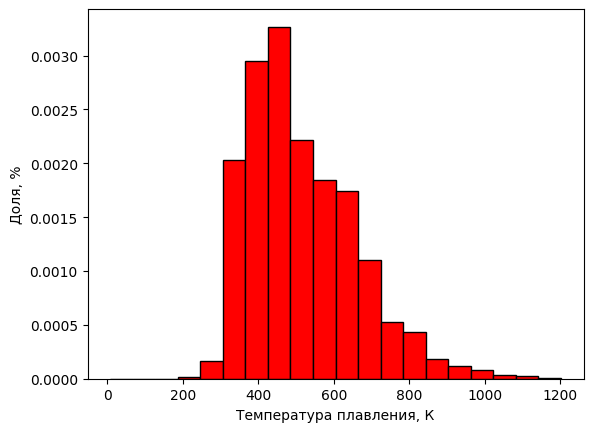

In [17]:
# Гистограмма распределения температуры плавления халькогенидных стекол
h = df['TG'].hist(
    bins=20,
    density=True,
    color='red',
    edgecolor='black',
    grid=False
)

# Подписи к осям
plt.xlabel('Температура плавления, К')
plt.ylabel('Доля, %')

# График
plt.show()

In [18]:
# Выделение из датасета объектов и признаков
X_data = df.iloc[:,:-1].to_numpy() # Выделение признаков в отдельный массив
Y_data = df['TG'].to_numpy() # Выделение объектов в отдельный массив

In [19]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, shuffle=True, random_state=18) # Разделение происходит случайным образом

In [20]:
# Метод K ближайших соседей (KNN)

In [21]:
# Метод случайного леса (Random Forest Tree)

In [22]:
# Многослойный Персептрон (MLP)